# Problem Statement

## Agriculture Commodities, Prices & Seasons
Aim: Your team is working on building a variety of insight packs to measure key trends in the Agriculture sector in India. You are presented with a data set around Agriculture and your aim is to understand trends in APMC (Agricultural produce market committee)/mandi price & quantity arrival data for different commodities in Maharashtra.

Objective:
    - Test and filter outliers.
    - Understand price fluctuations accounting the seasonal effect
        - Detect seasonality type (multiplicative or additive) for each cluster of APMC and commodities
        - De-seasonalise prices for each commodity and APMC according to the detected seasonality type
    - Compare prices in APMC/Mandi with MSP(Minimum Support Price)- raw and deseasonalised
    - Flag set of APMC/mandis and commodities with highest price fluctuation across different commodities in each relevant   season, and year.



# Data cleaning and Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

mondat = pd.read_csv("Monthly_data_cmo.csv")
cmomsp = pd.read_csv("CMO_MSP_Mandi.csv")

print(mondat.head())
print(mondat.shape)
print(cmomsp.head())
print(cmomsp.shape)

         APMC      Commodity  Year  Month  arrivals_in_qtl  min_price  \
0  Ahmednagar          Bajri  2015  April               79       1406   
1  Ahmednagar          Bajri  2016  April              106       1788   
2  Ahmednagar  Wheat(Husked)  2015  April             1253       1572   
3  Ahmednagar  Wheat(Husked)  2016  April              387       1750   
4  Ahmednagar  Sorgum(Jawar)  2015  April             3825       1600   

   max_price  modal_price     date district_name   state_name  
0       1538         1463  2015-04    Ahmadnagar  Maharashtra  
1       1925         1875  2016-04    Ahmadnagar  Maharashtra  
2       1890         1731  2015-04    Ahmadnagar  Maharashtra  
3       2220         1999  2016-04    Ahmadnagar  Maharashtra  
4       2200         1900  2015-04    Ahmadnagar  Maharashtra  
(62429, 11)
         commodity  year          Type  msprice  msp_filter
0   PADDY-UNHUSKED  2012  Kharif Crops   1250.0           1
1  RICE(PADDY-HUS)  2012  Kharif Crops   1280

Plotting the various entities to see the extent of outliers and use filters to clean them.

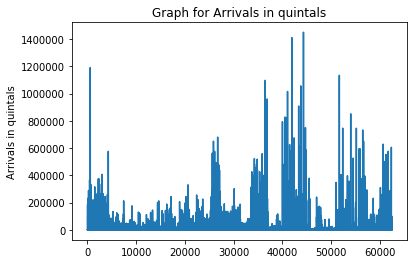

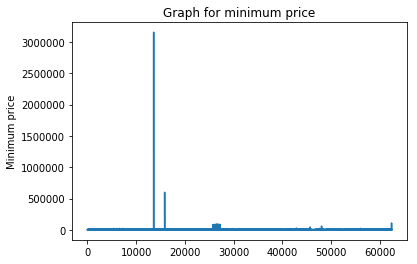

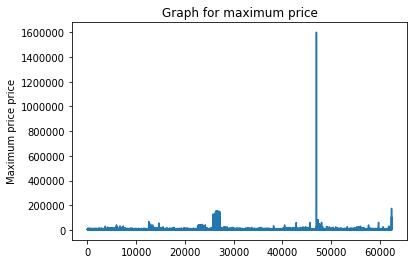

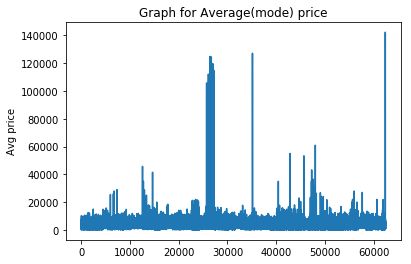

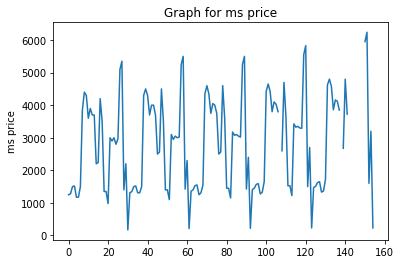

In [2]:

plt.plot(mondat.arrivals_in_qtl)
plt.ylabel("Arrivals in quintals")
plt.title("Graph for Arrivals in quintals")
plt.show()

plt.plot(mondat.min_price)
plt.ylabel("Minimum price")
plt.title("Graph for minimum price")
plt.show()

plt.plot(mondat.max_price)
plt.ylabel("Maximum price price")
plt.title("Graph for maximum price")
plt.show()

plt.plot(mondat.modal_price)
plt.ylabel("Avg price")
plt.title("Graph for Average(mode) price")
plt.show()

plt.plot(cmomsp.msprice)
plt.ylabel("ms price")
plt.title("Graph for ms price")
plt.show()



 # Dropping rows with NaN values

In [3]:
print("shape of Monthly data cmo before dropping nans: ", mondat.shape)
mondat = mondat.dropna(axis = 0, how ='any')
print("shape of Monthly data CMO after dropping nans: ", mondat.shape)

print("shape of CMO MSP Mandi before dropping nans: ", cmomsp.shape)
cmomsp = cmomsp.dropna(axis = 0, how = 'any')
print("shape of CMO MSP Mandi after dropping nans: ", cmomsp.shape)

shape of Monthly data cmo before dropping nans:  (62429, 11)
shape of Monthly data CMO after dropping nans:  (62429, 11)
shape of CMO MSP Mandi before dropping nans:  (155, 5)
shape of CMO MSP Mandi after dropping nans:  (145, 5)


# Analysis

## Arrival in quintals
- The data points are spread across a wide range of values, a good filter would be taking all data points within +3,    -3 of the std dev of the data. 

## Minimum Price
- There are just a few outliers which are extremely larger than others data points. A good filter would be taking all data points within +1, -1 of std dev of the data

## Maximum Price
- Similar to minimum price, there are a few outliers, hence can take data points within +1 and -1 of the std dev of the data.

## Avg Price
- Extensively spread across diverse values, safe to take within 3 to -3 of the std dev of the data.

## MS Price
- As it looks like an seasonal/time-series graph with no such extreme outliers in the range, it would be safe to take wider pipe, lets say between 3, -3 of std dev.

Note- The above numbers are guessed values, I will define a percentage-retain variable to check how much percebtage of data we are actually retaining after applying filters. Above 90 percent is somewhat safe.


In [4]:
ini_size = len(mondat.arrivals_in_qtl)
#mondat = mondat[np.abs(mondat.arrivals_in_qtl) <= (4*mondat.arrivals_in_qtl.mean())]
mondat = mondat[np.abs(mondat.arrivals_in_qtl-mondat.arrivals_in_qtl.mean()) <= (3*mondat.arrivals_in_qtl.std())]
fin_size = len(mondat.arrivals_in_qtl)
print("No. of data points cleaned: ", ini_size - fin_size)
per_retain = (fin_size) *100/ini_size
print("Percentage retain for Arrivals in quintals :",per_retain)

ini_size = len(mondat.min_price)
#mondat = mondat[np.abs(mondat.min_price-mondat.min_price.mean()) <= (mondat.min_price.mean())]
mondat = mondat[np.abs(mondat.min_price-mondat.min_price.mean()) <= (mondat.min_price.std())]
fin_size = len(mondat.min_price)
print("No. of data points cleaned: ", ini_size - fin_size)
per_retain = (fin_size) *100/ini_size
print("Percentage retain for Minimum price :",per_retain)

ini_size = len(mondat.max_price)
#mondat = mondat[np.abs(mondat.max_price - mondat.max_price.mean()) <= (mondat.max_price.mean())]
mondat = mondat[np.abs(mondat.max_price-mondat.max_price.mean()) <= (mondat.max_price.std())]
fin_size = len(mondat.max_price)
print("No. of data points cleaned: ", ini_size - fin_size)
per_retain = (fin_size) *100/ini_size
print("Percentage retain for Maximum price :",per_retain)

ini_size = len(mondat.modal_price)
#mondat = mondat[np.abs(mondat.modal_price - mondat.modal_price.mean()) <= (4*mondat.modal_price.mean())]
mondat = mondat[np.abs(mondat.modal_price-mondat.modal_price.mean()) <= (3*mondat.modal_price.std())]
fin_size = len(mondat.modal_price)
print("No. of data points cleaned: ", ini_size - fin_size)
per_retain = (fin_size) *100/ini_size
print("Percentage retain for modal price :",per_retain)

ini_size = len(cmomsp.msprice)
#cmomsp = cmomsp[np.abs(cmomsp.msprice - cmomsp.msprice.mean()) <= (4*cmomsp.msprice.mean())]
cmomsp = cmomsp[np.abs(cmomsp.msprice-cmomsp.msprice.mean()) <= (3*cmomsp.msprice.std())]
fin_size = len(cmomsp.msprice)
print("No. of data points cleaned: ", ini_size - fin_size)
per_retain = (fin_size) *100/ini_size
print("Percentage retain for ms price :",per_retain)




No. of data points cleaned:  719
Percentage retain for Arrivals in quintals : 98.848291659325
No. of data points cleaned:  139
Percentage retain for Minimum price : 99.77475287635716
No. of data points cleaned:  1154
Percentage retain for Maximum price : 98.12574101443862
No. of data points cleaned:  178
Percentage retain for modal price : 99.70538093582933
No. of data points cleaned:  0
Percentage retain for ms price : 100.0


# Plots after cleaning

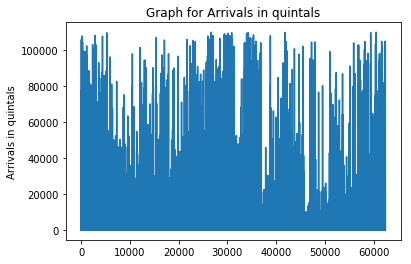

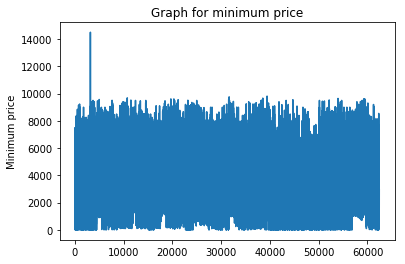

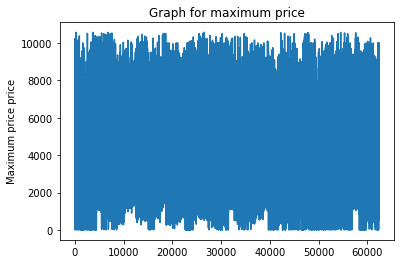

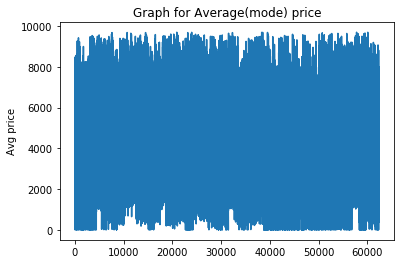

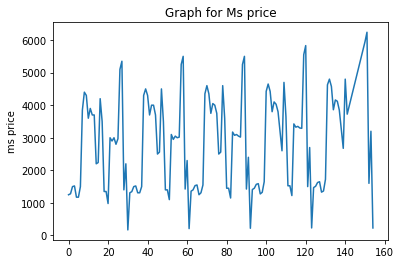

In [5]:
plt.plot(mondat.arrivals_in_qtl)
plt.ylabel("Arrivals in quintals")
plt.title("Graph for Arrivals in quintals")
plt.show()

plt.plot(mondat.min_price)
plt.ylabel("Minimum price")
plt.title("Graph for minimum price")
plt.show()

plt.plot(mondat.max_price)
plt.ylabel("Maximum price price")
plt.title("Graph for maximum price")
plt.show()

plt.plot(mondat.modal_price)
plt.ylabel("Avg price")
plt.title("Graph for Average(mode) price")
plt.show()

plt.plot(cmomsp.msprice)
plt.ylabel("ms price")
plt.title("Graph for Ms price")
plt.show()


# Saving cleaned data into new csv files

In [6]:
print("Final shape of Monthly_data_cmo: ", mondat.shape)
mondat.to_csv("cleaned_Monthly_data_cmo.csv")

print("Final shape of CMO_MSP_Mandi: ", cmomsp.shape)
mondat.to_csv("cleaned_CMO_MSP_Mandi.csv")

Final shape of Monthly_data_cmo:  (60239, 11)
Final shape of CMO_MSP_Mandi:  (145, 5)
